In [14]:
import requests
import pandas as pd
import pprint


In [15]:
# Api de INE - Instituto Nacional de Estadistica
url = "https://servicios.ine.es/wstempus/js/ES/DATOS_TABLA/50902"
r = requests.get(url)
data = r.json()


In [16]:
Df = pd.json_normalize(data[0]['Data'])
Df['Fecha'] = pd.to_datetime(Df['Fecha'], unit = 'ms')
Df['Fecha'] = Df['Fecha'].dt.date
Df

,Fecha,FK_TipoDato,FK_Periodo,Anyo,Valor,Secreto
0,2025-08-31,1,9,2025,118.485,False
1,2025-07-31,1,8,2025,118.824,False
2,2025-06-30,1,7,2025,118.777,False
3,2025-05-31,1,6,2025,118.867,False
4,2025-04-30,1,5,2025,118.077,False
...,...,...,...,...,...,...
280,2002-04-30,1,5,2002,71.374,False
281,2002-03-31,1,4,2002,71.118,False
282,2002-02-28,1,3,2002,70.165,False
283,2002-01-31,1,2,2002,69.590,False


In [17]:
año_valor = ['Anyo', 'Valor']
df = Df[año_valor]
df

,Anyo,Valor
0,2025,118.485
1,2025,118.824
2,2025,118.777
3,2025,118.867
4,2025,118.077
...,...,...
280,2002,71.374
281,2002,71.118
282,2002,70.165
283,2002,69.590


/var/folders/g0/wlz2mvtn4dgf0k5cq1m6vkgr0000gn/T/ipykernel_10062/2216220788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anyo'] = pd.to_numeric(df['Anyo'], errors='coerce')
/var/folders/g0/wlz2mvtn4dgf0k5cq1m6vkgr0000gn/T/ipykernel_10062/2216220788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')


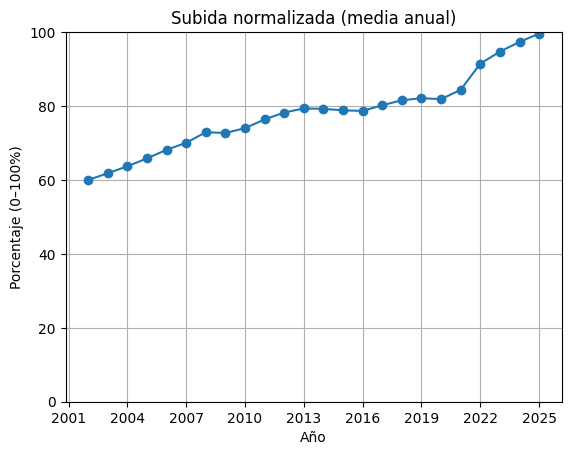

In [ ]:
#En esta grafica nos mostrara que ha subido un 40% desde 2002

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


MAX_RAW = 118.485

df['Anyo'] = pd.to_numeric(df['Anyo'], errors='coerce')
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')
df = df.dropna(subset=['Anyo','Valor'])

anual = (df.groupby('Anyo', as_index=False)['Valor'].mean()
           .sort_values('Anyo'))

anual['Porcentaje'] = (anual['Valor'] / MAX_RAW * 100).clip(0, 100)

plt.figure()
plt.plot(anual['Anyo'], anual['Porcentaje'], marker='o')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 100)
plt.xlabel('Año'); plt.ylabel('Porcentaje (0–100%)')
plt.title('Subida normalizada (media anual)')
plt.grid(True); plt.show()
